In [60]:
import torch
from torch import  nn # nn contains all of pytorch building blocks
import  matplotlib.pyplot as plt

In [61]:
torch.__version__

'2.0.1'

In [62]:
#Regression

# Y = a + bx  where a = weights , b =bias

In [63]:
# create known parameters
weight = 0.7
bias = 0.3

#Create

start = 0
end =1
step = 0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)

In [64]:
Y = weight + X +bias

In [65]:
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [66]:
Y

tensor([[1.0000],
        [1.0200],
        [1.0400],
        [1.0600],
        [1.0800],
        [1.1000],
        [1.1200],
        [1.1400],
        [1.1600],
        [1.1800],
        [1.2000],
        [1.2200],
        [1.2400],
        [1.2600],
        [1.2800],
        [1.3000],
        [1.3200],
        [1.3400],
        [1.3600],
        [1.3800],
        [1.4000],
        [1.4200],
        [1.4400],
        [1.4600],
        [1.4800],
        [1.5000],
        [1.5200],
        [1.5400],
        [1.5600],
        [1.5800],
        [1.6000],
        [1.6200],
        [1.6400],
        [1.6600],
        [1.6800],
        [1.7000],
        [1.7200],
        [1.7400],
        [1.7600],
        [1.7800],
        [1.8000],
        [1.8200],
        [1.8400],
        [1.8600],
        [1.8800],
        [1.9000],
        [1.9200],
        [1.9400],
        [1.9600],
        [1.9800]])

In [67]:
## splitting data into training and testing

train_split = int(0.8 * len(X))
X_train,Y_train = X[:train_split],Y[:train_split]
X_test,Y_test = X[train_split:],Y[train_split:]

In [68]:
#ploting Data

def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):

    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_labels,c="b",s=4,label = "Training Data")

    plt.scatter(test_data,test_labels,c="r",s=4,label = "Testing Data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c="g",s=4,label = "Predictions")

    plt.legend(prop ={"size":14})




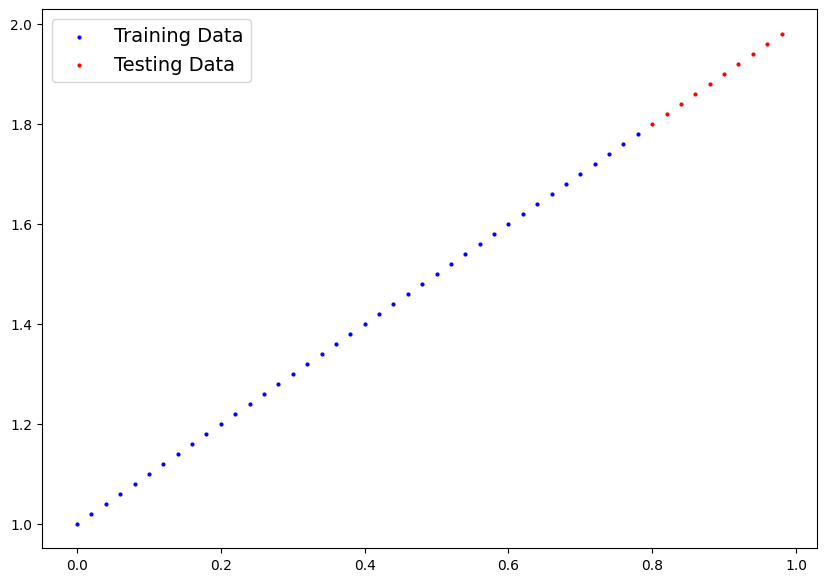

In [69]:
plot_predictions()

In [70]:
#Simple Linear regression Model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True)

        # Forward Method


    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias #this is the Linear regression formula


In [71]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [72]:
list(model_0.parameters()) #list the parameters

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [73]:
#list named parameter

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [74]:
#testig the model without training the model

with torch.inference_mode():
    y_preds = model_0(X_test)

with torch.no_grad():
    y_preds = model_0(X_test)

In [75]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

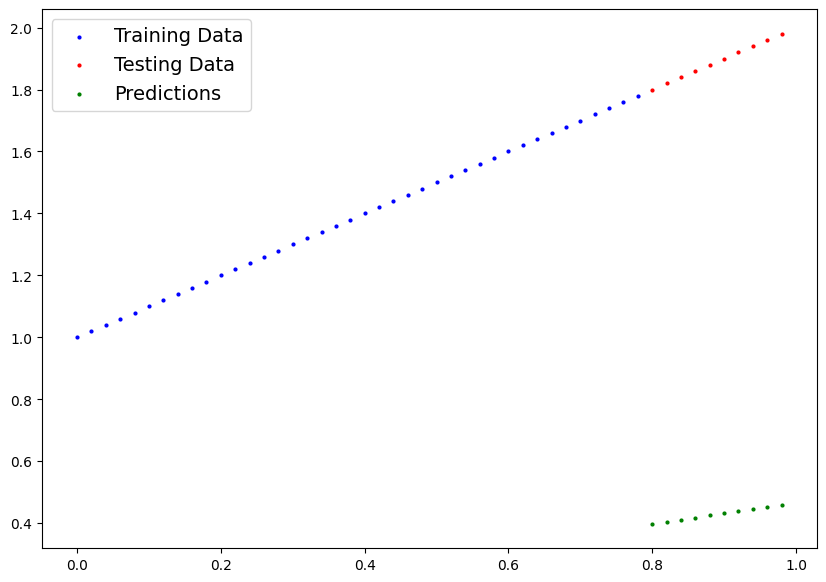

In [76]:
plot_predictions(predictions=y_preds)

In [77]:
y_pred = model_0(X_test)   #without inference_mode
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [78]:
#Training the model

#loss function may be called as cost func

#loss func : A func to measure how wrong your models prediction are to the ideal outputs, is the lesser the better
#Optimizer : takes into account the loss of model and adjust its weights and bias

In [79]:
#setup a loss function

loss_fn = nn.L1Loss()

#setup a optimizer  ( stochastic gradient descent )

opt_fn = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [80]:
torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
    model_0.train() #Train model in PyTorch set all parameters that require gradient to require gradient

    y_pred = model_0(X_train)
    loss = loss_fn(y_pred,Y_train)

    opt_fn.zero_grad()
    #Perform Backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    opt_fn.step()

    model_0.eval() # sets the Gradient to False sets it evaluation mode

In [81]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7221])), ('bias', tensor([1.0783]))])

In [82]:
print(loss)

tensor(0.0614, grad_fn=<MeanBackward0>)


In [83]:
with torch.inference_mode(): # turns off gradient tracking or torch.no_grad
    test_pred = model_0(X_test)

    # calculate the loss
    test_loss = loss_fn(test_pred,Y_test)

In [84]:
print(f"The loss is {test_loss} ")

The loss is 0.16902245581150055 


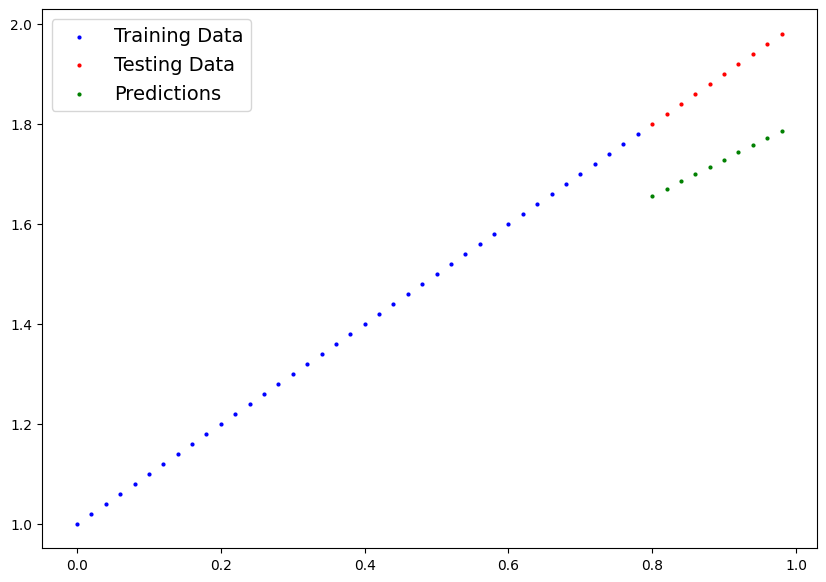

In [85]:
plot_predictions(predictions=test_pred)

In [104]:
Model_Name =  "simple-model.pth"
torch.save(model_0.state_dict(),Model_Name)